In [2]:
import csv, pandas
import numpy as np

In [19]:
#ServerApp.iopub_data_rate_limit=(1000000.0*10)
with open('og-only.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    data = list(reader)
    #for line in reader:
    #    print(line)

#print(data)
#print(data)
npdata = np.array(data)
#print(npdata)
data = npdata[1:].transpose()

date = np.array(data[2])
injuries = np.array(data[12], dtype='int')
killed   = np.array(data[13], dtype='int')

print(date)

year = [int(fulldate.split('/')[2]) for fulldate in date]

#print(year)
#share = np.array(data[4], dtype='float')
#country = np.array(data[2])
#city = np.array(data[1])
#print(country)

['1/2/2008' '1/2/2008' '1/2/2008' ... '4/25/2019' '4/2/2017' '6/15/2018']


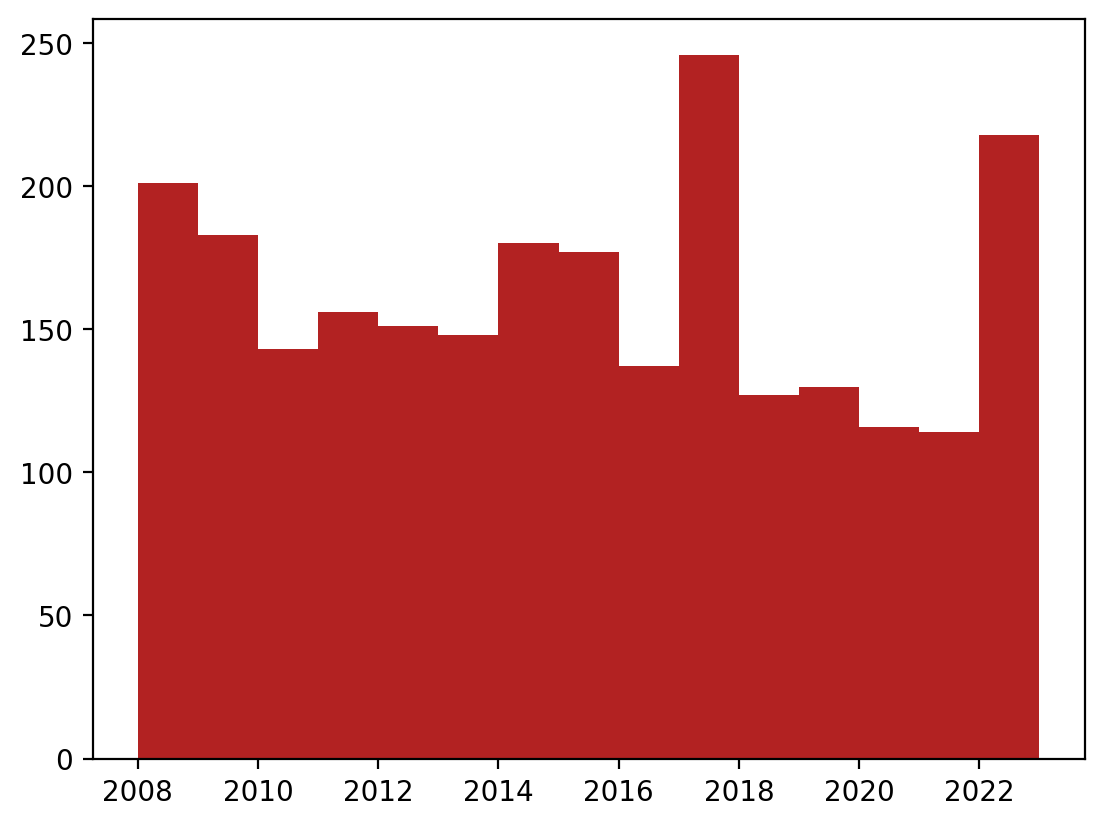

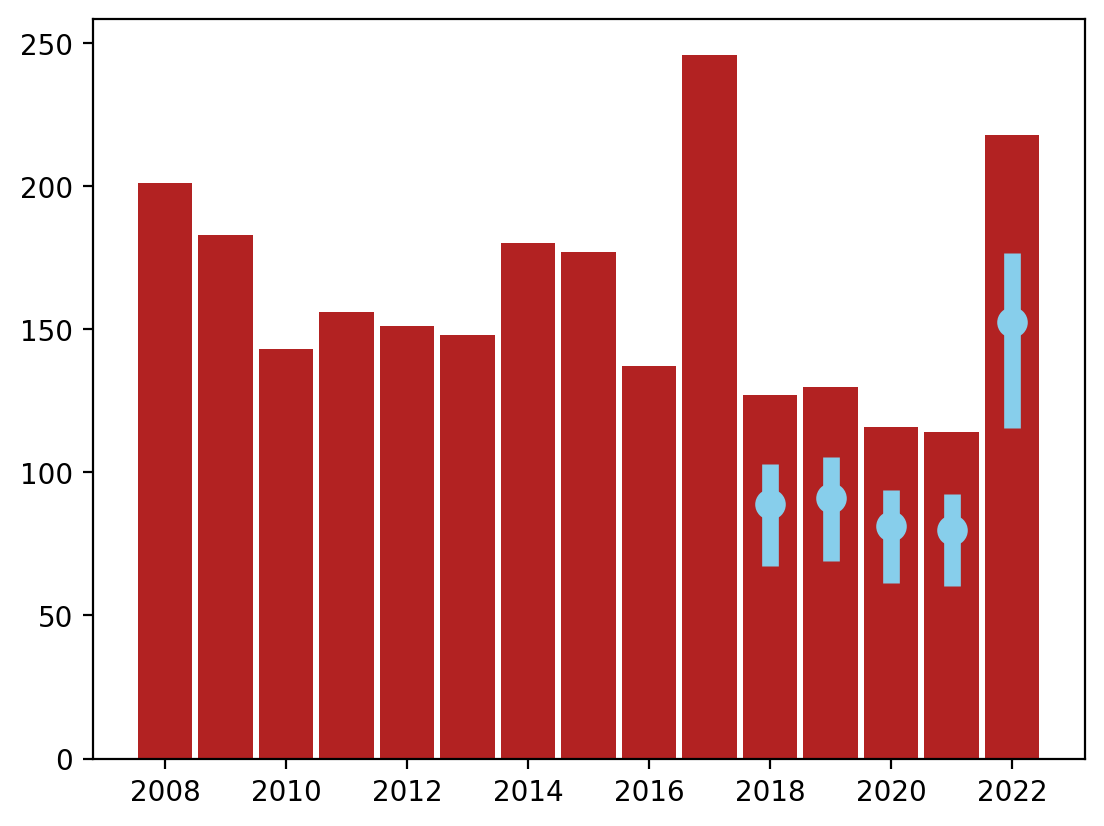

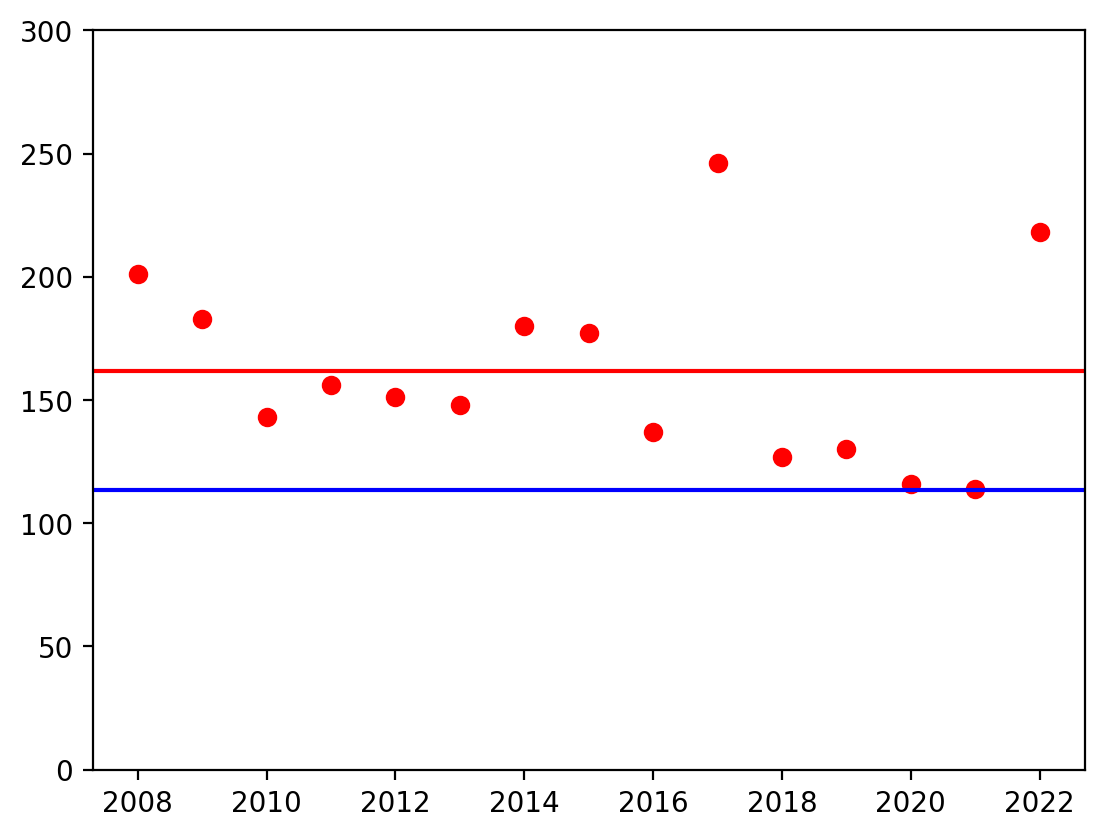

In [54]:
import matplotlib.pyplot as plt
from adjustText import adjust_text
%config InlineBackend.figure_format='retina'

# -- histogram by year
bins = np.arange(2008,2024)
value, bins, patches = plt.hist(year, bins=bins, color='firebrick')

plt.figure()
plt.bar(bins[:-1], value, color='firebrick', width=0.9)
#plt.bar(bins[10:-1], 0.7*value[10:], color='blue')

future = value[10:]
lower_error = 0.17 * future
upper_error = 0.11 * future
asymmetric_error = [lower_error, upper_error]

plt.errorbar(bins[10:-1], 0.7*future, yerr=asymmetric_error, fmt='o', color='skyblue', markersize=10, linewidth=6)


plt.figure()
plt.scatter(bins[0:-1],value, c='r')
plt.ylim(0,300)

avg = value.mean()

plt.axhline(y = avg, color = 'r', linestyle = '-') 

plt.axhline(y = avg*.7, color = 'b', linestyle = '-') 


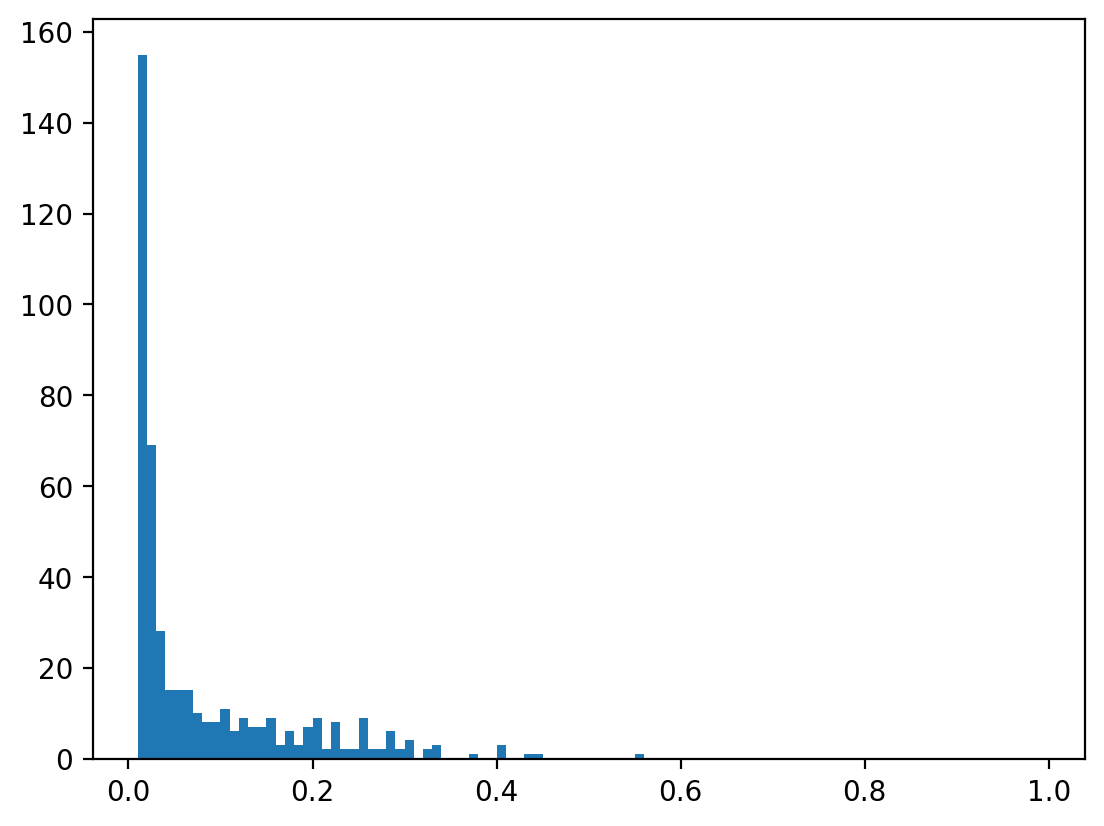

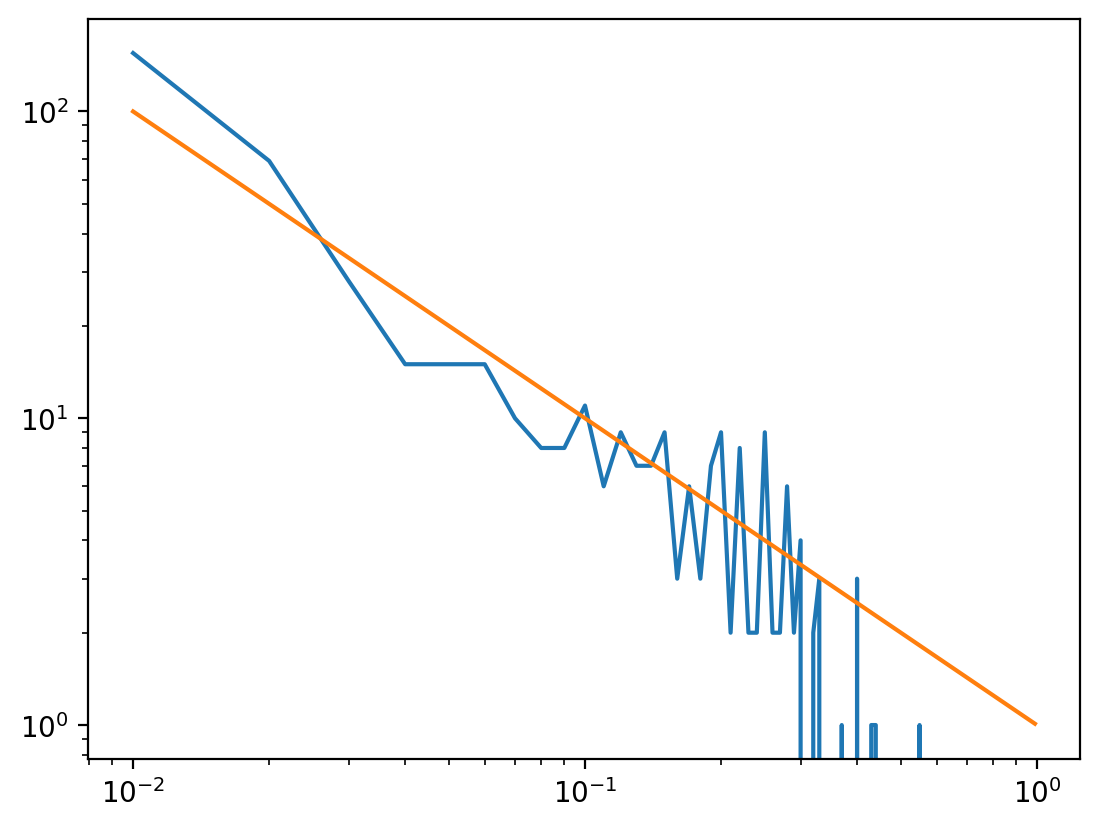

In [31]:
#print(np.log10(share))
a,b,c = plt.hist(share, bins=np.arange(.01,1,0.01))
#plt.set_yscale('log')
plt.figure()
plt.loglog(b[:-1],a)
model = 1*b**-1
plt.loglog(b,model)

[0.001      0.00143845 0.00206914 0.00297635 0.00428133 0.00615848
 0.00885867 0.01274275 0.01832981 0.02636651 0.0379269  0.05455595
 0.078476   0.11288379 0.16237767 0.23357215 0.33598183 0.48329302
 0.6951928  1.        ]


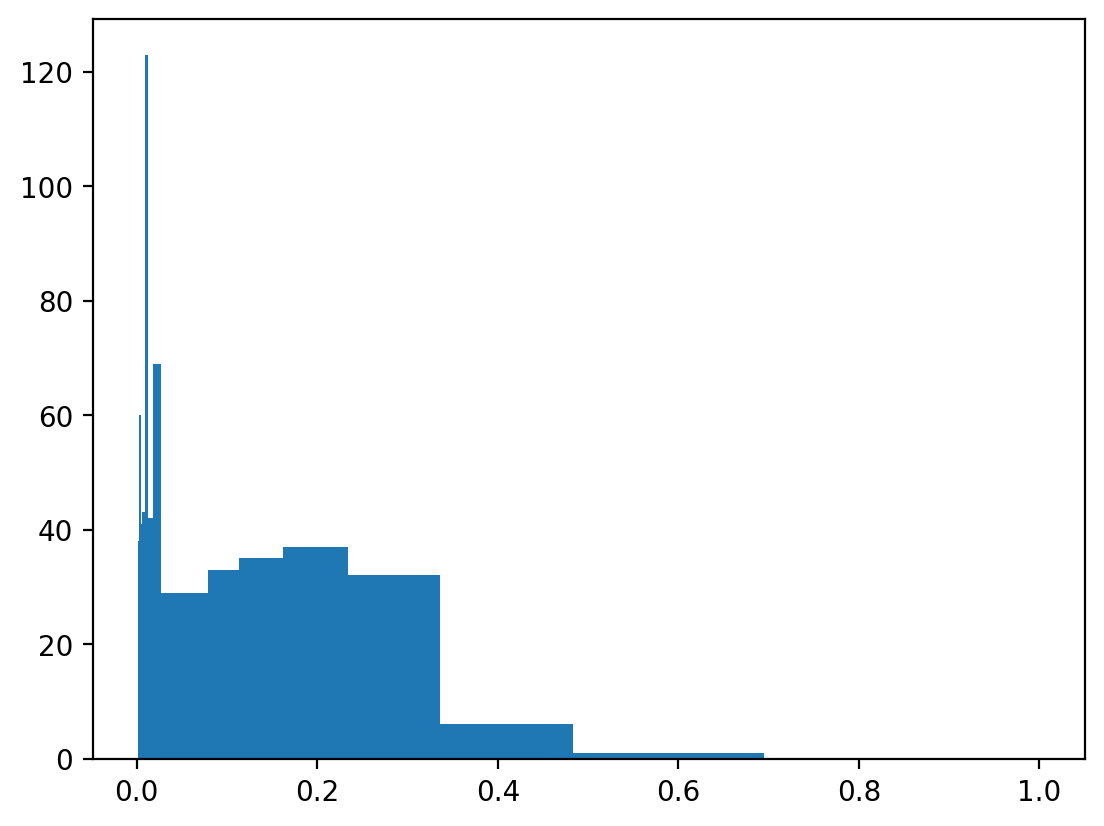

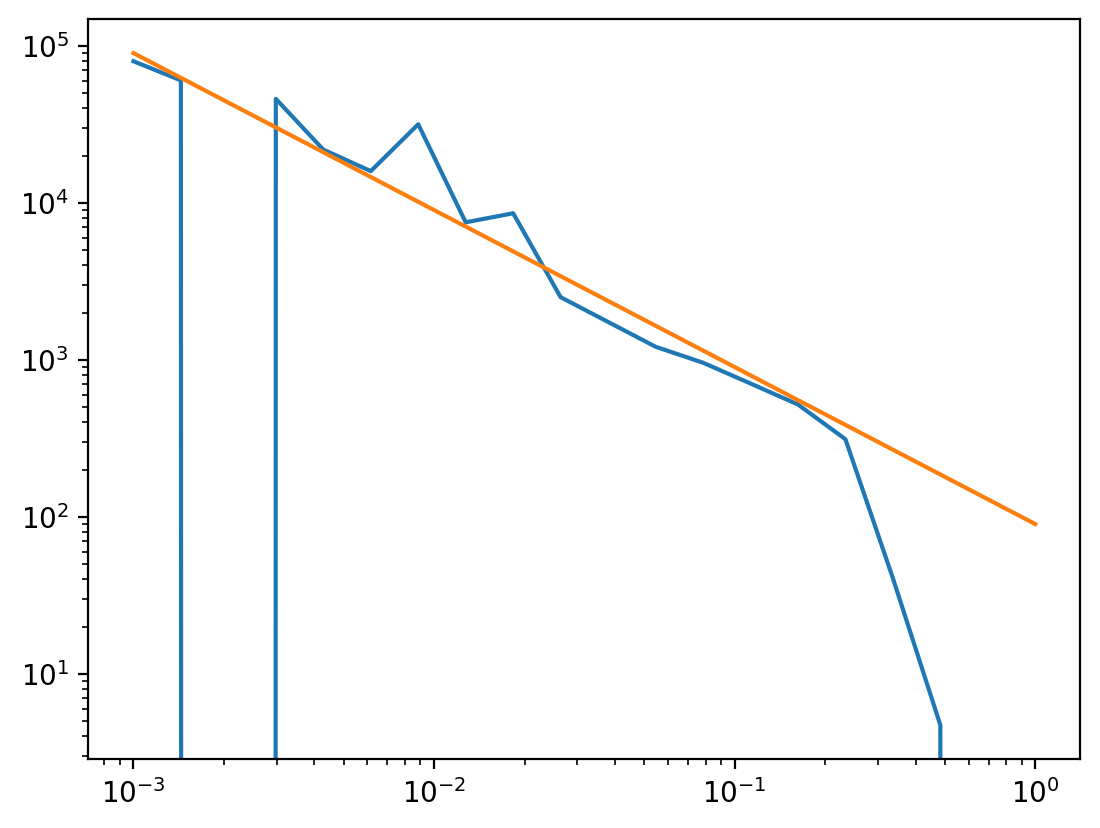

In [54]:
bins=np.logspace(np.log10(0.001),np.log10(1.0), 20)
print(bins)
a,b,c = plt.hist(share, bins=bins)
plt.figure()

width = np.diff(b)
plt.loglog(b[:-1],a/width)
model = 90*b**-1.0
plt.loglog(b,model)

Text(0.5, 1.0, '70 cities built for enthusiastic riders')

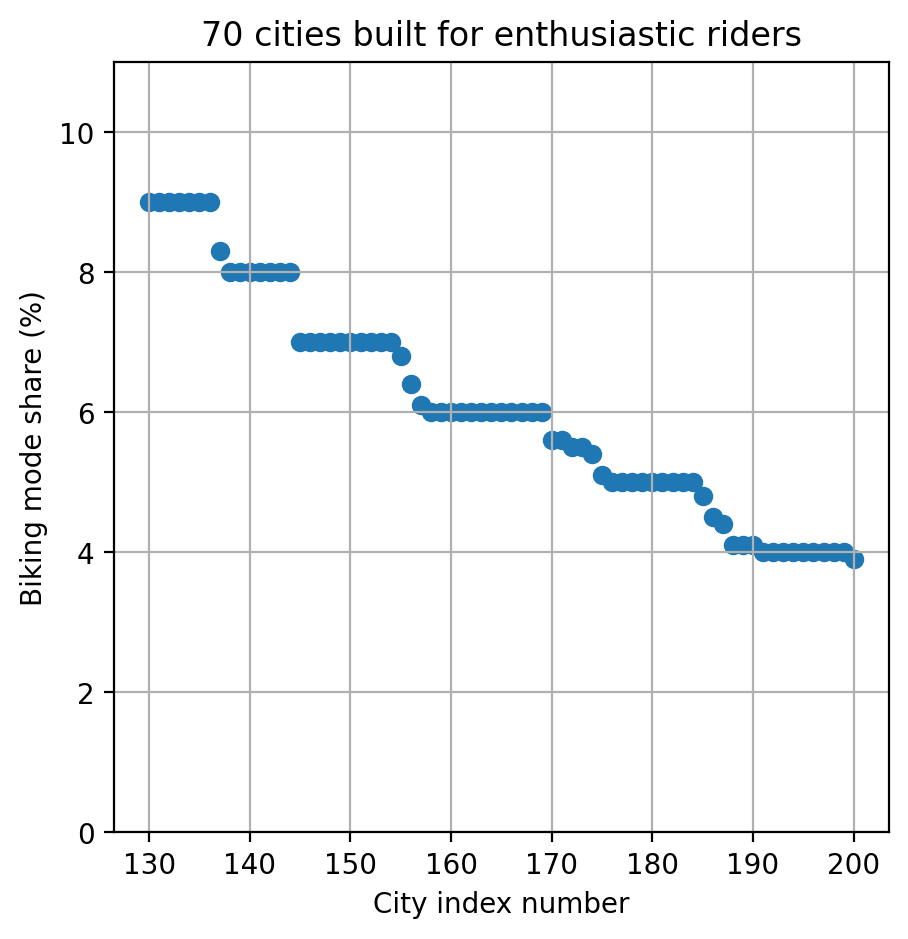

In [5]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(index[129:200], share[129:200]*100)
plt.ylim(0,11)
plt.grid(True)
plt.ylabel('Biking mode share (%)')
plt.xlabel('City index number')
plt.title('70 cities built for enthusiastic riders')